# DECLARAMOS LAS LIBRERIAS #

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

In [2]:
warnings.filterwarnings('ignore')

# CARGAMOS LOS PRUEBAS QUE SON CORRECTAS #

In [3]:
df = pd.read_csv('experimental_data.csv')
df.shape

(10, 15)

In [4]:
X = df.iloc[:, 1:15] 

In [5]:
X.head()

,Largo_24,Ancho_24,Largo_48,Ancho_48,Largo_72,Ancho_72,Largo_96,Ancho_96,Largo_120,Ancho_120,Largo_144,Ancho_144,Largo_168,Ancho_168
0,682.54,518.28,696.67,546.57,709.17,535.85,928.58,716.29,915.92,739.04,973.45,702.40,1073.42,824.69
1,641.26,583.49,670.88,591.67,676.28,573.60,890.68,669.90,803.73,690.07,865.35,808.97,909.23,886.37
2,707.53,558.40,745.78,540.54,735.86,570.17,934.01,687.43,956.67,718.37,1013.99,751.33,1024.18,891.69
3,700.31,584.17,661.71,606.90,717.17,594.54,811.61,680.59,936.10,771.09,963.66,795.07,1000.40,987.65
4,654.94,634.39,665.15,632.51,663.34,637.80,673.37,757.11,824.57,744.92,886.94,797.50,985.06,840.04


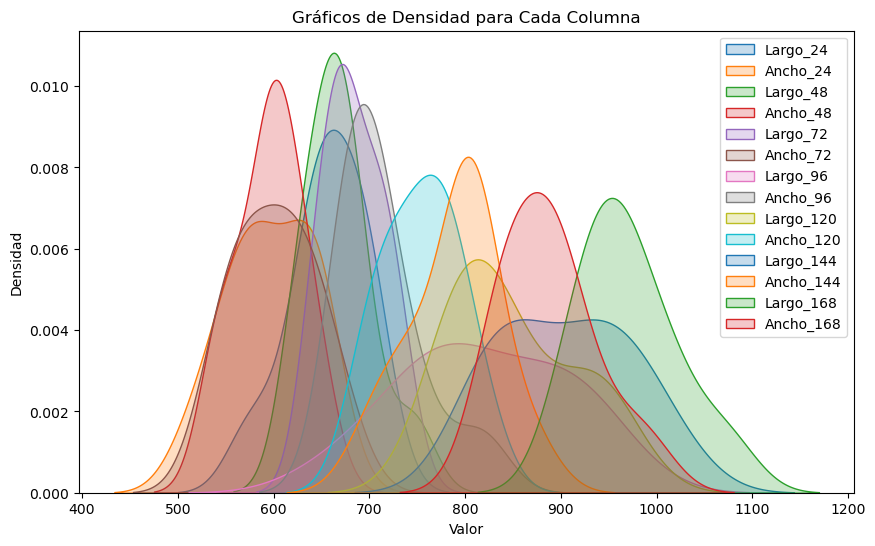

In [6]:
# Crear gráficos de densidad para cada columna
plt.figure(figsize=(10, 6))

for column in X.columns:
    sns.kdeplot(X[column], fill=True, label=column, bw_adjust=1)

plt.title('Gráficos de Densidad para Cada Columna')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# UTILIZAMOS KERNEL DENSITY

Para estimar la densidad de los datos y luego generar nuevas muestras a partir de esta densidad.

In [7]:
# Definir un rango de valores de bandwidth para buscar
params = {'bandwidth': np.linspace(0.1, 1.0, 30)}

#Definimos una semilla para no variar los valores en ejecuciones
np.random.seed(62)

# Crear el modelo KernelDensity
kde = KernelDensity(kernel='gaussian')

# Configurar la búsqueda en cuadrícula con CV(5 folds)
grid = GridSearchCV(kde, params, cv=5, n_jobs=-1)

# Ajustar el modelo a los datos
grid.fit(X)

# Evaluar el modelo utilizando el mejor bandwidth
kde_best = grid.best_estimator_

print("Mejor bandwidth encontrado:", grid.best_params_['bandwidth'])

Mejor bandwidth encontrado: 1.0


In [8]:
kde_best.fit(X)

new_samples = kde_best.sample(5)


df_new_samples = pd.DataFrame(new_samples, columns=X.columns)

df_new_samples.head()

,Largo_24,Ancho_24,Largo_48,Ancho_48,Largo_72,Ancho_72,Largo_96,Ancho_96,Largo_120,Ancho_120,Largo_144,Ancho_144,Largo_168,Ancho_168
0,682.910153,516.471997,695.932205,545.797847,709.304844,536.269354,929.486128,717.250232,914.593829,738.639295,973.561328,702.425477,1072.300614,824.373810
1,653.165338,635.733928,666.030383,632.438851,663.176609,636.890239,673.552750,757.767047,825.499330,744.013578,886.338161,796.639888,985.217236,838.180140
2,657.367708,641.254225,663.655917,648.958205,700.891365,673.438342,872.437665,816.824464,848.286451,821.667039,932.163568,867.199395,941.545081,907.493854
3,653.542512,634.514702,665.732726,631.810678,664.429308,637.924470,672.839291,756.314183,827.429339,746.928079,887.379960,797.251191,984.724425,840.871030
4,576.922793,648.738474,624.763504,603.141260,642.115411,614.055073,744.907879,707.095645,776.355326,767.536235,815.207928,798.587510,913.265889,852.677583


In [9]:
columns_largos = ['Largo_24','Largo_48','Largo_72','Largo_96','Largo_120', 'Largo_144', 'Largo_168']
columns_anchos = ['Ancho_24','Ancho_48','Ancho_72','Ancho_96','Ancho_120', 'Ancho_144', 'Ancho_168']

# CALCULAMOS LOS VALORES PARA CADA INTERVALO DE TIEMPO 

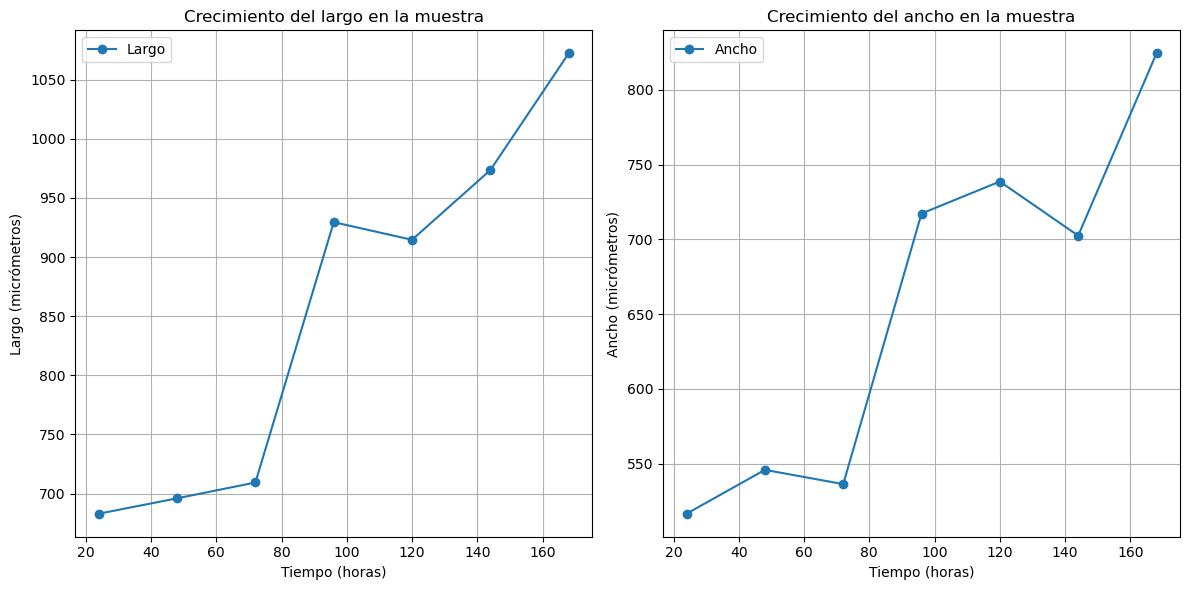

Tiempo: 24 horas -> Largo: 682.91 µm, Ancho: 516.47 µm
Tiempo: 48 horas -> Largo: 695.93 µm, Ancho: 545.80 µm
Tiempo: 72 horas -> Largo: 709.30 µm, Ancho: 536.27 µm
Tiempo: 96 horas -> Largo: 929.49 µm, Ancho: 717.25 µm
Tiempo: 120 horas -> Largo: 914.59 µm, Ancho: 738.64 µm
Tiempo: 144 horas -> Largo: 973.56 µm, Ancho: 702.43 µm
Tiempo: 168 horas -> Largo: 1072.30 µm, Ancho: 824.37 µm


In [10]:
# Tiempos de medición (en horas)
tiempos = np.array([24, 48, 72, 96, 120, 144, 168])

#Obtenemos los valores de la primera muestra generada con Kernel
largos = df_new_samples[columns_largos].iloc[0].values
anchos = df_new_samples[columns_anchos].iloc[0].values

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Gráfico para largos
plt.subplot(1, 2, 1)
plt.plot(tiempos, largos, 'o-', label='Largo')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Largo (micrómetros)')
plt.title('Crecimiento del largo en la muestra')
plt.legend()
plt.grid(True)

# Gráfico para anchos
plt.subplot(1, 2, 2)
plt.plot(tiempos, anchos, 'o-', label='Ancho')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Ancho (micrómetros)')
plt.title('Crecimiento del ancho en la muestra')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Mostrar resultados
for dimensiones in list(zip(tiempos,largos, anchos)):
    tiempo, largo, ancho = dimensiones
    print(f"Tiempo: {tiempo} horas -> Largo: {largo:.2f} µm, Ancho: {ancho:.2f} µm")


# Volumenes de la muestra

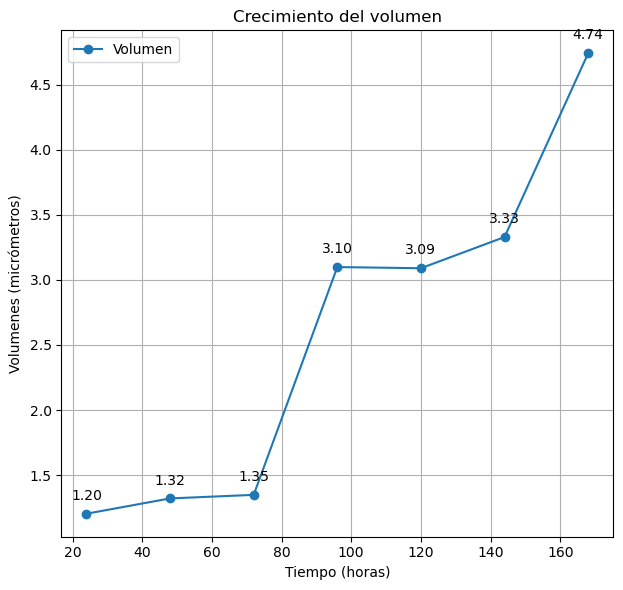

Hora: 24 -> Volumen: 1.204325612913426
Hora: 48 -> Volumen: 1.3217085279801564
Hora: 72 -> Volumen: 1.349021387488778
Hora: 96 -> Volumen: 3.098321831263758
Hora: 120 -> Volumen: 3.0892919019324867
Hora: 144 -> Volumen: 3.3288704062532095
Hora: 168 -> Volumen: 4.739442947751539


In [11]:
volumenes = (0.5*largos*largos*anchos)/100000000

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Gráfico para volumen
plt.subplot(1, 2, 1)
plt.plot(tiempos, volumenes, 'o-', label='Volumen')
# Añadir etiquetas en cada punto
for i, (x, y) in enumerate(zip(tiempos, volumenes)):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Tiempo (horas)')
plt.ylabel('Volumenes (micrómetros)')
plt.title('Crecimiento del volumen')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

for i,v in enumerate(volumenes):
    print(f"Hora: {tiempos[i]} -> Volumen: {v}")

# DEFINIMOS LOS PARAMETROS PARA LAS GRÁFICAS

In [12]:
# Definir los parámetros de los esferoides
# Datos iniciales
c1 = largos[0] # Distancia desde el centro hasta el polo del primer esferoide(Largo)
a1 = anchos[0] # Semieje ecuatorial del primer esferoide(Ancho)

c2 = largos[6]# Distancia desde el centro hasta el polo del segundo esferoide(Largo)
a2 = anchos[6]# Semieje ecuatorial del segundo esferoide(Ancho)

In [13]:
# Crear valores para los ángulos phi y theta
phi = np.linspace(0, 2 * np.pi, 100)
theta = np.linspace(0, np.pi, 100)

In [14]:
# Calcular las coordenadas cartesianas de los dos esferoides
x1 = a1 * np.outer(np.cos(phi), np.sin(theta))
y1 = a1 * np.outer(np.sin(phi), np.sin(theta))
z1 = c1 * np.outer(np.ones(np.size(phi)), np.cos(theta))

x2 = a2 * np.outer(np.cos(phi), np.sin(theta))
y2 = a2 * np.outer(np.sin(phi), np.sin(theta))
z2 = c2 * np.outer(np.ones(np.size(phi)), np.cos(theta))

# GRAFICO UNO SOBRE OTRO

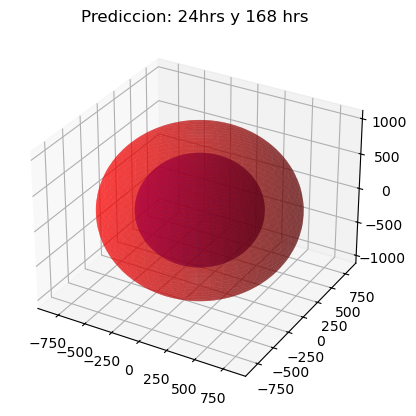

In [15]:
# Crear la figura y los ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los dos esferoides
ax.plot_surface(x1, y1, z1, color='b', alpha=0.5)
ax.plot_surface(x2, y2, z2, color='r', alpha=0.5)

# Ajustar la relación de aspecto de los ejes
ax.set_aspect('auto')
ax.set_title('Prediccion: 24hrs y 168 hrs')

# Mostrar el gráfico
plt.show()


# GRAFICO INICIO-FINAL

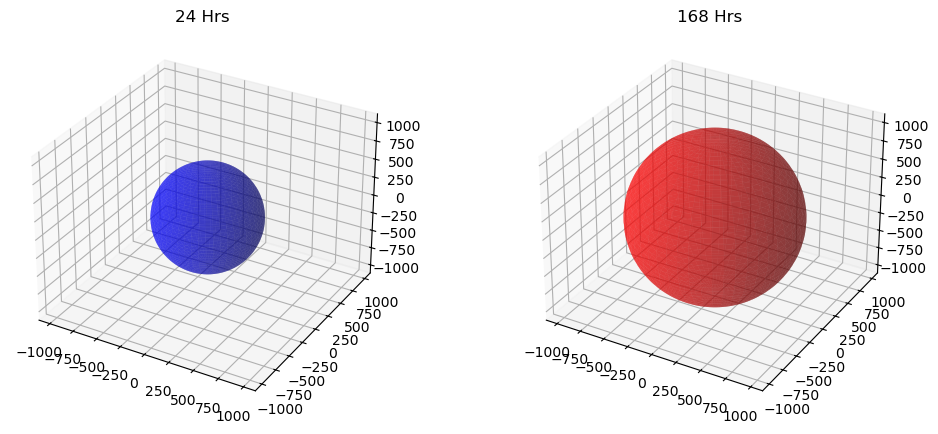

In [16]:
#Encontrar limites inferiores y maximos
max_lim = max(np.max(x1), np.max(y1), np.max(z1), np.max(x2), np.max(y2), np.max(z2))
min_lim = min(np.min(x1), np.min(y1), np.min(z1), np.min(x2), np.min(y2), np.min(z2))

# Crear las figuras y los ejes 3D
fig = plt.figure(figsize=(12, 5))

# Subgráfico 1
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x1, y1, z1, color='b', alpha=0.5)
ax1.set_title('24 Hrs')
ax1.set_xlim(min_lim, max_lim)
ax1.set_ylim(min_lim, max_lim)
ax1.set_zlim(min_lim, max_lim)


# Subgráfico 2
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x2, y2, z2, color='r', alpha=0.5)
ax2.set_title('168 Hrs')
ax2.set_xlim(min_lim, max_lim)
ax2.set_ylim(min_lim, max_lim)
ax2.set_zlim(min_lim, max_lim)

# Mostrar los gráficos
plt.show()

# GRAFICA DE INTERPOLADO 24-168hrs

En el análisis numérico, se denomina interpolación a obtención de nuevos puntos partiendo del conocimiento de un conjunto de puntos.

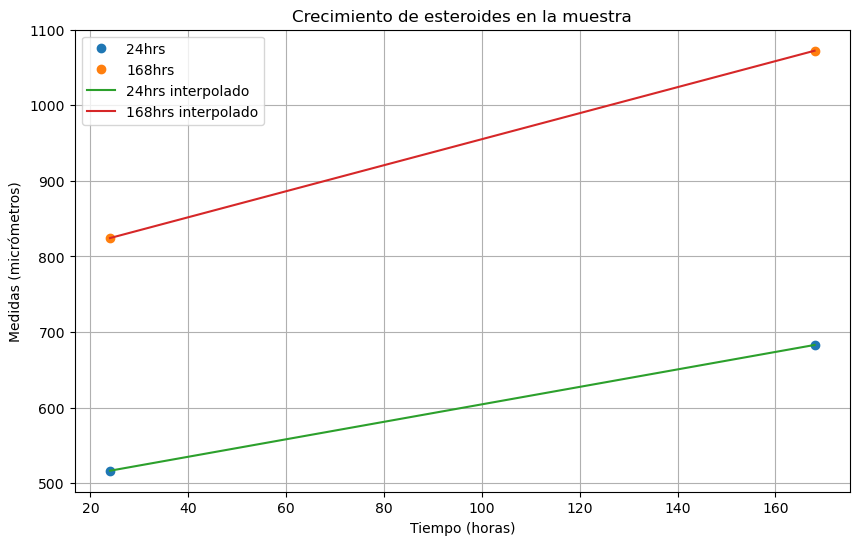

Tiempo: 24 horas -> Largo: 516.47 µm, Ancho: 824.37 µm
Tiempo: 168 horas -> Largo: 544.21 µm, Ancho: 865.69 µm


In [17]:
tiempos = np.array([24, 168])  # tiempos en horas
medidas_1 = np.array([a1, c1])  # largo 1 en micrómetros
medidas_2 = np.array([a2, c2])  # largo 2 en micrómetros

# Interpolación lineal para encontrar largos intermedios
tiempos_intermedios = np.array([24, 48, 72, 96, 120, 144, 168])  # tiempos intermedios

# Funciones de interpolación lineal
interp_medidas_1 = np.interp(tiempos_intermedios, tiempos, medidas_1)
interp_medidas_2 = np.interp(tiempos_intermedios, tiempos, medidas_2)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(tiempos, medidas_1, 'o', label='24hrs')
plt.plot(tiempos, medidas_2, 'o', label='168hrs')
plt.plot(tiempos_intermedios, interp_medidas_1, '-', label='24hrs interpolado')
plt.plot(tiempos_intermedios, interp_medidas_2, '-', label='168hrs interpolado')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Medidas (micrómetros)')
plt.title('Crecimiento de esteroides en la muestra')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar resultados
for dimensiones in list(zip(tiempos,interp_medidas_1, interp_medidas_2)):
    tiempo, largo, ancho = dimensiones
    print(f"Tiempo: {tiempo} horas -> Largo: {largo:.2f} µm, Ancho: {ancho:.2f} µm")
    

## Animated

In [18]:
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [19]:

# Crear la ventana principal
root = tk.Tk()
root.title("Animacion crecimiento de 24 a 168 hrs")

# Crear la figura y el eje 3D
fig = plt.Figure()
ax = fig.add_subplot(111, projection='3d')

# Definir los parámetros para las 7 esferas
params = [
    {'t':24, 'c': largos[0], 'a': anchos[0]},
    {'t':48,'c': largos[1], 'a': anchos[1]},
    {'t':72,'c': largos[2], 'a': anchos[2]},
    {'t':96,'c': largos[3], 'a': anchos[3]},
    {'t':120,'c': largos[4], 'a': anchos[4]},
    {'t':144,'c': largos[5], 'a': anchos[5]},
    {'t':168,'c': largos[6], 'a': anchos[6]}
]

# Crear una esfera que representa la célula del asteroide
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Índice de la esfera actual
current_index = 0

# Crear una etiqueta con instrucciones
instructions = tk.Label(root, text=f"""""")
instructions.pack(side=tk.BOTTOM, fill=tk.X)


# Función para dibujar la esfera actual
def draw_sphere(index):
    ax.clear()
    ax.set_xlim(-1200, 1200)
    ax.set_ylim(-1200, 1200)
    ax.set_zlim(-1200, 1200)
    
    # Obtener parámetros para la esfera actual
    c = params[index]['c']
    a = params[index]['a']
    t = params[index]['t']
    
    # Calcular las coordenadas de la esfera
    x_scaled = a * x
    y_scaled = a * y
    z_scaled = c * z
    
    # Dibujar la esfera
    selected_color = tk.StringVar(value='yellow')
    ax.plot_surface(x_scaled, y_scaled, z_scaled, color=selected_color.get(), alpha=0.6)
    
    # Ajustar el ángulo de visión
    ax.view_init(elev=20., azim=30)
    
    # Actualizar el canvas de tkinter
    canvas.draw()
    
    instructions.config(text=f"""Muestra a la hora: {t} hrs
    \nAncho: {a:.2f}, Largo: {c:.2f}
    \nVolumen((4/3)pi*(a^2)*c): {(0.5)*a*a*c:.2f}
    \nVolumen2.0(Volumen/10^7): {(0.5*a*a*c)/100000000}
    \nUsa la flecha derecha para mostrar el siguiente crecimiento
    \nUsa la flecha izquierda para mostrar el crecimiento anterior""")

# Función para manejar eventos de teclado
def on_key_press(event):
    global current_index
    global hora
    if event.keysym == 'Right':
        current_index = (current_index + 1) % len(params)
        draw_sphere(current_index)
    elif event.keysym == 'Left':
        current_index = (current_index - 1) % len(params)
        draw_sphere(current_index)

# Crear un widget de canvas para incluir la figura en la ventana de tkinter
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Asignar la función de manejo de eventos de teclado
root.bind('<KeyPress>', on_key_press)

# Función para cerrar la ventana
def on_closing():
    root.quit()
    root.destroy()

root.protocol("WM_DELETE_WINDOW", on_closing)

# Inicializar la primera esfera
draw_sphere(current_index)

# Iniciar el loop de la ventana
tk.mainloop()